In [ ]:
#need to install geopandas package

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
df = pd.read_csv("Downloads/carnivore-spotter-export3.csv")

In [3]:
county_map = gpd.read_file("Downloads/zipcode_boundaries/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp")

In [ ]:
#imported map from OpenStreetMap (local downloaded items)

In [4]:
spring_map = plt.imread("Downloads/spring_map.png")#osm

In [5]:
kc_map = plt.imread("Downloads/kc.png")

In [6]:
summer_map = plt.imread("Downloads/summer_map.png")

In [7]:
cols = ['ID','Vocalization','Vocalization_Description', 'Carnivore_Response',
       'Number_of_Young Species', 'Number_of_Adult Species','Eating','Time_Seen','Latitude', 'Longitude', 'Behavior','Time_Submitted',
       'Reaction_Desription','Species', 'On_Leash', 'Number_of_Adults',
       'Number_of_Children','Confidence','Uploaded_Media', 'Dog_Size',
       'General_Comments','Neighborhood','Animal_Features',
       'Conflict_Description','Reaction', 'Conflict','Number_of_Dogs']
df.columns = cols

In [8]:
df['Time_Seen']=pd.to_datetime(df.Time_Seen).copy()

In [9]:
df['Month']=df.Time_Seen.dt.month

In [10]:
df['Hour']=df.Time_Seen.dt.hour

In [11]:
spring_df = df[(df.Month>=3)&(df.Month<=5)]

In [41]:
spring_df.count()

ID                          108
Vocalization                  6
Vocalization_Description      6
Carnivore_Response           60
Number_of_Young Species     108
Number_of_Adult Species     108
Eating                        6
Time_Seen                   108
Latitude                    108
Longitude                   108
Behavior                     69
Time_Submitted              108
Reaction_Desription          12
Species                     108
On_Leash                      7
Number_of_Adults             51
Number_of_Children           27
Confidence                  108
Uploaded_Media              108
Dog_Size                      9
General_Comments             46
Neighborhood                108
Animal_Features               0
Conflict_Description         14
Reaction                     50
Conflict                     49
Number_of_Dogs               44
Month                       108
Hour                        108
geometry                    108
dtype: int64

In [ ]:
#boundary is defined using open street map

In [12]:
BBox_kc = ((-122.5346,-121.0941,47.7763,47.1878,))

In [13]:
BBox_spring=(spring_df.Longitude.min(),spring_df.Longitude.max(),spring_df.Latitude.min(),spring_df.Latitude.max())
print(BBox_spring)

(-122.64831097481846, -121.38045514734057, 47.38861802383204, 48.79995470699132)


In [14]:
geo_spring_df = gpd.GeoDataFrame(spring_df, geometry=gpd.points_from_xy(spring_df.Latitude,spring_df.Longitude))

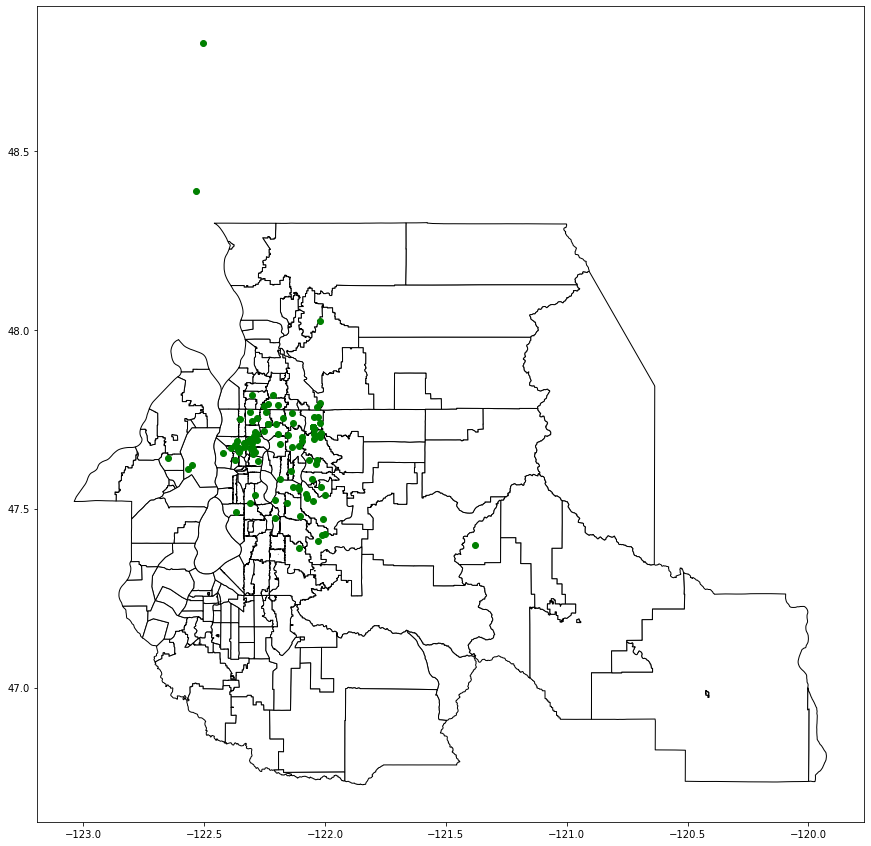

In [38]:
county_map.plot(color = 'white',edgecolor='black',figsize=(15,15))
plt.scatter(y=geo_spring_df['Latitude'],x=geo_spring_df['Longitude'],c='green')

In [ ]:
#the map may not be accurate

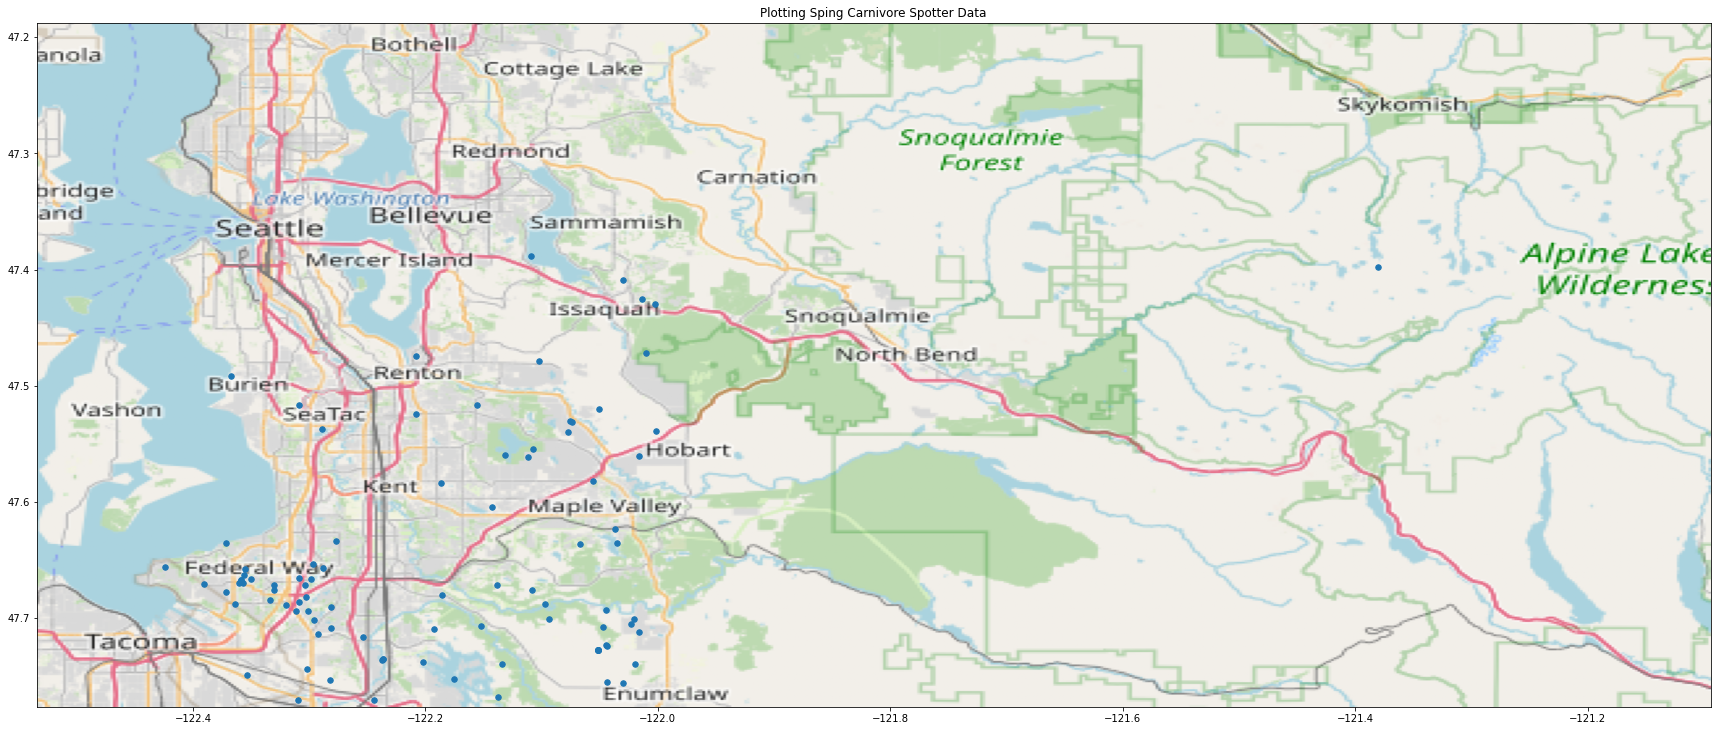

In [16]:
fig,ax=plt.subplots(figsize=(30,30))
ax.scatter(spring_df.Longitude,spring_df.Latitude,zorder=1, s=30)
ax.set_title("Plotting Sping Carnivore Spotter Data")
ax.set_xlim(BBox_kc[0],BBox_kc[1])
ax.set_ylim(BBox_kc[2],BBox_kc[3])
ax.imshow(kc_map,zorder=0,extent=BBox_kc,aspect='equal')


In [18]:
summer_df = df[(df.Month>=6)&(df.Month<=8)] 
summer_df = summer_df.drop(summer_df['Longitude'].idxmax())
summer_df = summer_df.drop(summer_df['Latitude'].idxmin())

In [19]:
BBox_summer=(summer_df.Longitude.min(),summer_df.Longitude.max(),summer_df.Latitude.min(),summer_df.Latitude.max())
print(BBox_summer)

(-124.70231611937064, -121.12986247748897, 47.02215817090581, 48.75473969814056)


In [20]:
geo_summer_df = gpd.GeoDataFrame(summer_df, geometry=gpd.points_from_xy(summer_df.Latitude,summer_df.Longitude))

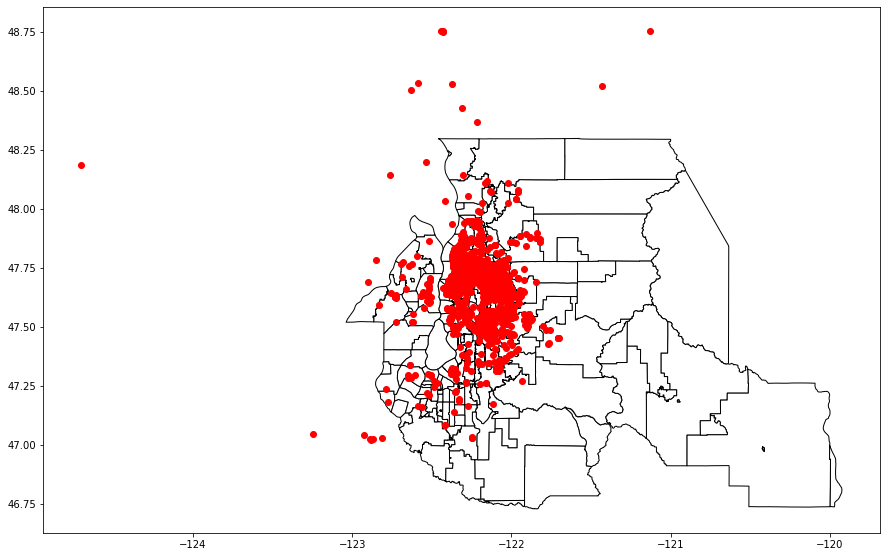

In [40]:
county_map.plot(color = 'white',edgecolor='black',figsize=(15,15))
plt.scatter(y=geo_summer_df['Latitude'],x=geo_summer_df['Longitude'],c='red')

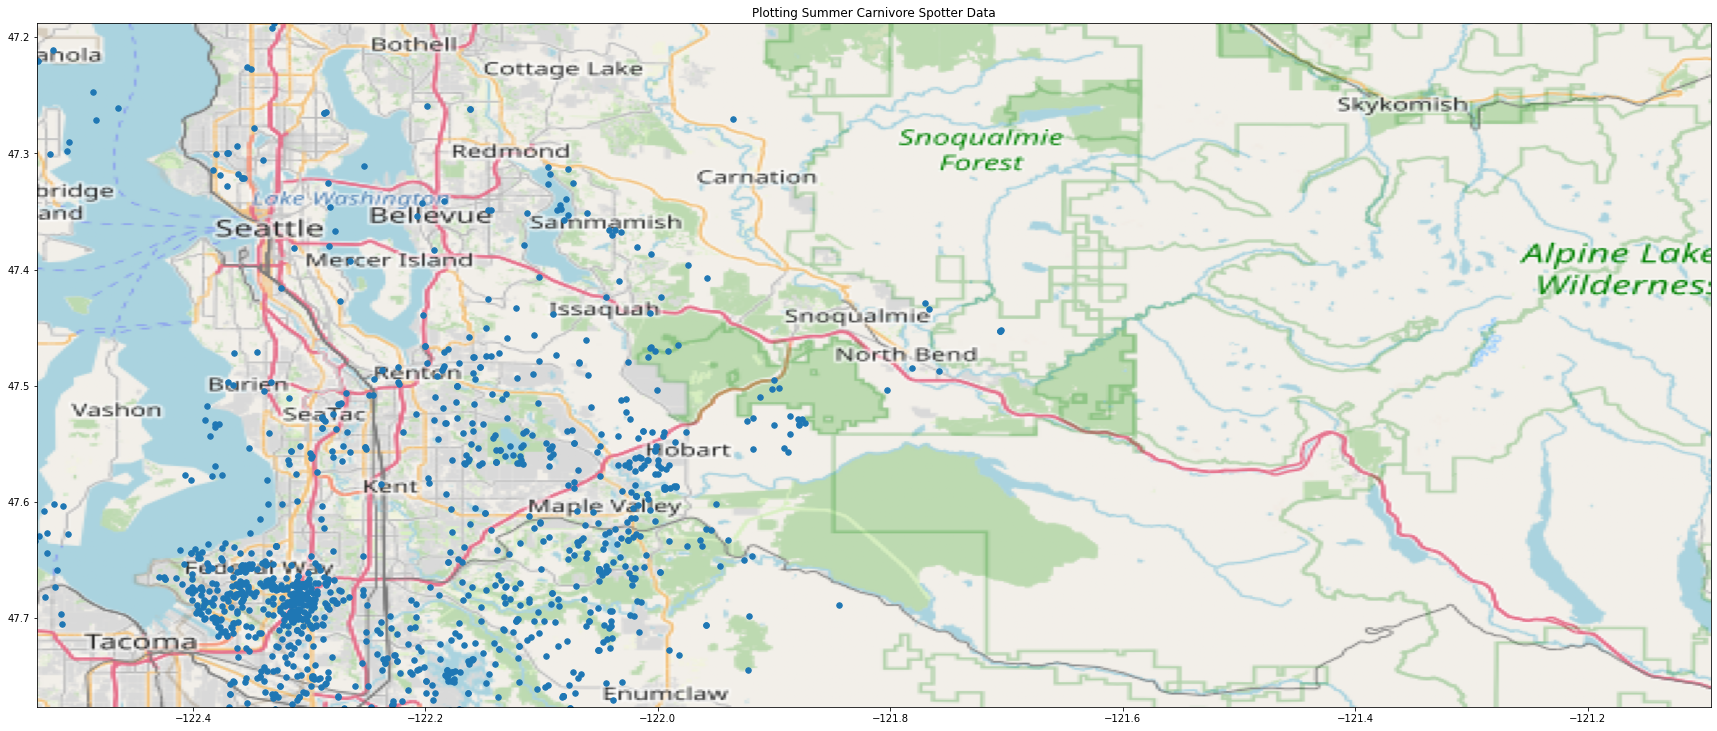

In [22]:
fig,ax=plt.subplots(figsize=(30,30))
ax.scatter(summer_df.Longitude,summer_df.Latitude,zorder=1,s=30)
ax.set_title("Plotting Summer Carnivore Spotter Data")
ax.set_xlim(BBox_kc[0],BBox_kc[1])
ax.set_ylim(BBox_kc[2],BBox_kc[3])
ax.imshow(kc_map,zorder=0,extent=BBox_kc, aspect = 'equal')


In [23]:
#fall

In [24]:
fall_df = df[(df.Month>=9)&(df.Month<=11)]

In [25]:
BBox_fall=(fall_df.Longitude.min(),fall_df.Longitude.max(),fall_df.Latitude.min(),fall_df.Latitude.max())
print(BBox_fall)

(-124.04185466343027, -120.5343594, 46.1813116, 48.68905417999998)


In [26]:
geo_fall_df = gpd.GeoDataFrame(fall_df, geometry=gpd.points_from_xy(fall_df.Latitude,fall_df.Longitude))

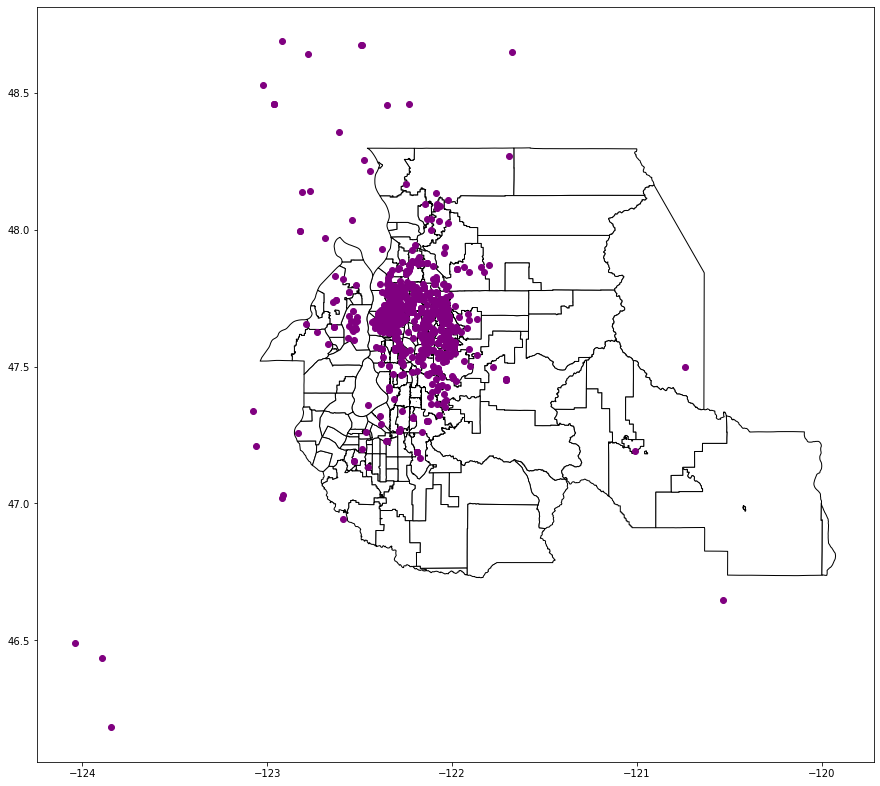

In [27]:
county_map.plot(color = 'white',edgecolor='black',figsize=(15,15))
plt.scatter(y=geo_fall_df['Latitude'],x=geo_fall_df['Longitude'],c='purple')

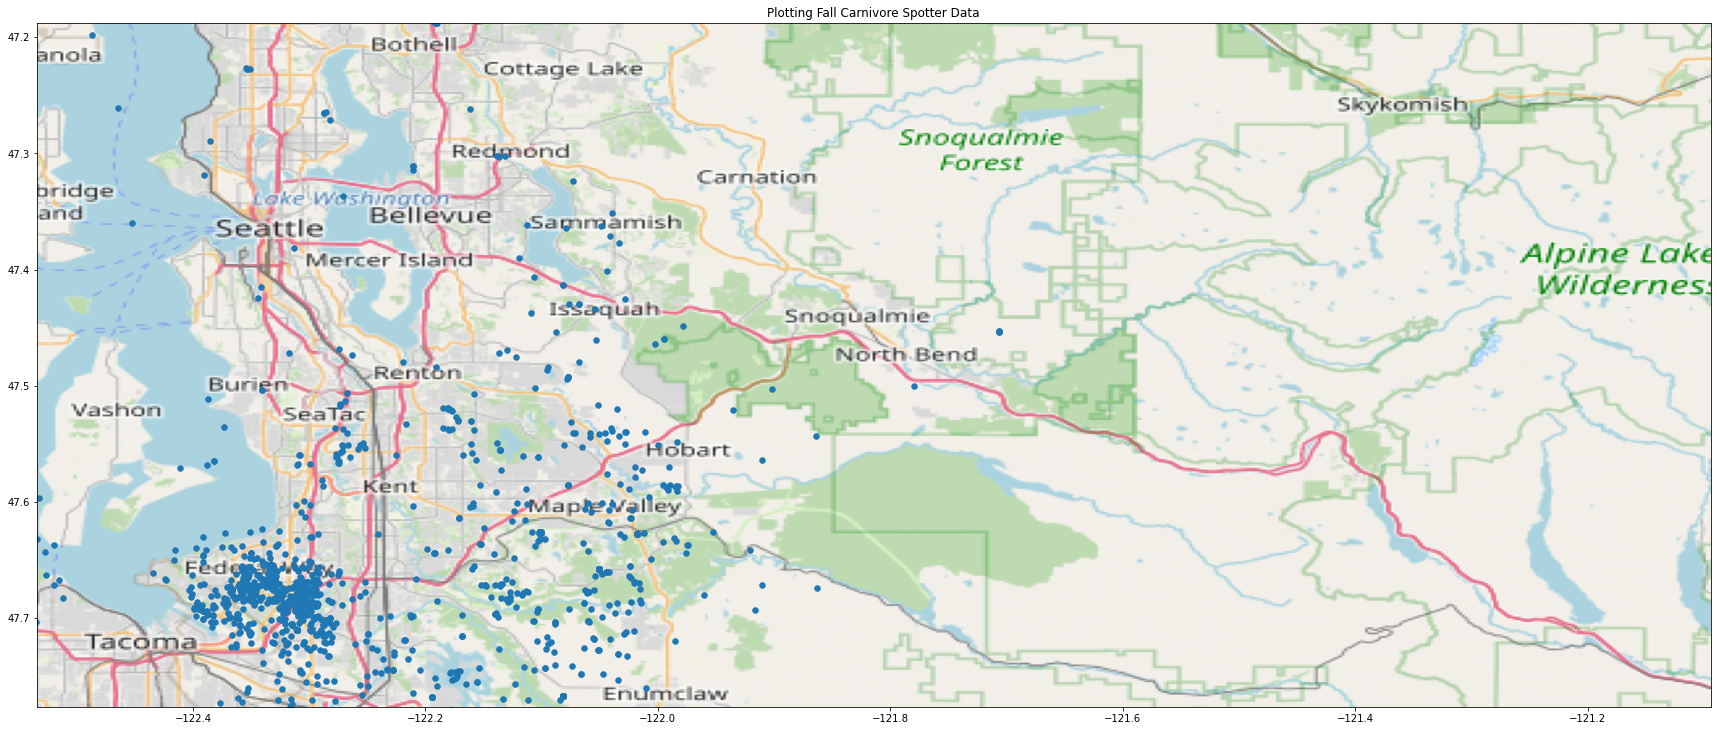

In [28]:
fig,ax=plt.subplots(figsize=(30,30))
ax.scatter(fall_df.Longitude,fall_df.Latitude,zorder = 1, s=30)
ax.set_title("Plotting Fall Carnivore Spotter Data")
ax.set_xlim(BBox_kc[0],BBox_kc[1])
ax.set_ylim(BBox_kc[2],BBox_kc[3])
ax.imshow(kc_map,extent=BBox_kc, aspect = 'equal')


In [29]:
#winter

In [30]:
winter_df = df[(df.Month==12)|((df.Month==1)|(df.Month==2))]

In [31]:
BBox_winter=(winter_df.Longitude.min(),winter_df.Longitude.max(),winter_df.Latitude.min(),winter_df.Latitude.max())
print(BBox_winter)

(-122.78661095737444, -121.99433290000002, 47.09013218230066, 48.80378636917911)


In [32]:
geo_winter_df = gpd.GeoDataFrame(winter_df, geometry=gpd.points_from_xy(winter_df.Latitude,winter_df.Longitude))

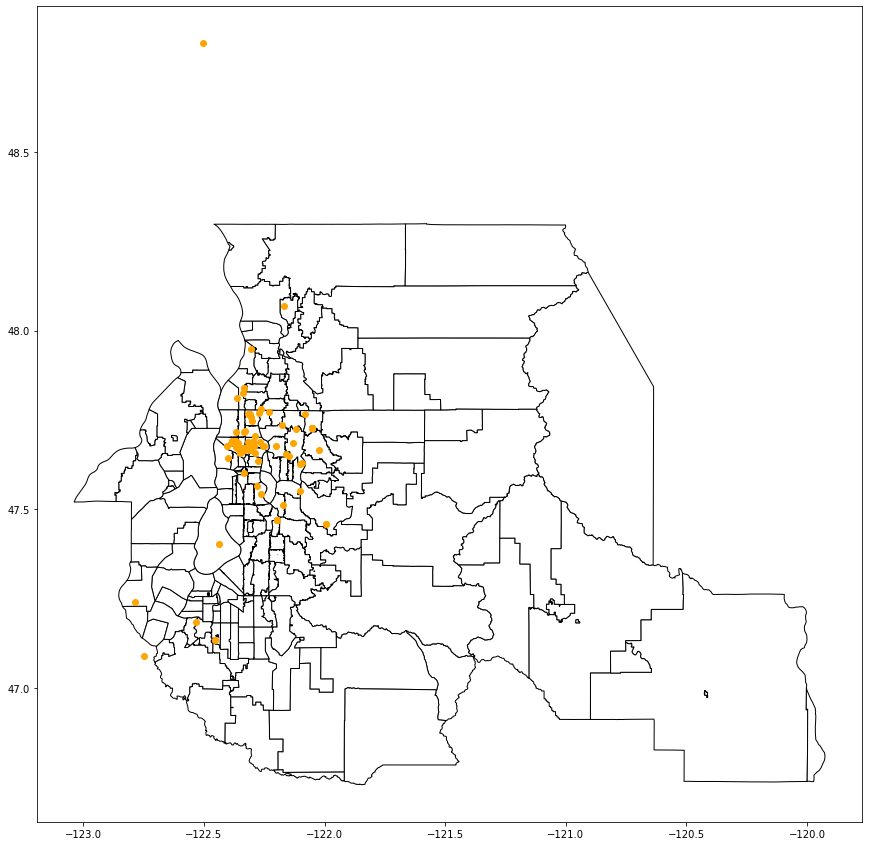

In [33]:
county_map.plot(color = 'white',edgecolor='black',figsize=(15,15))
plt.scatter(y=geo_winter_df['Latitude'],x=geo_winter_df['Longitude'],c='orange')

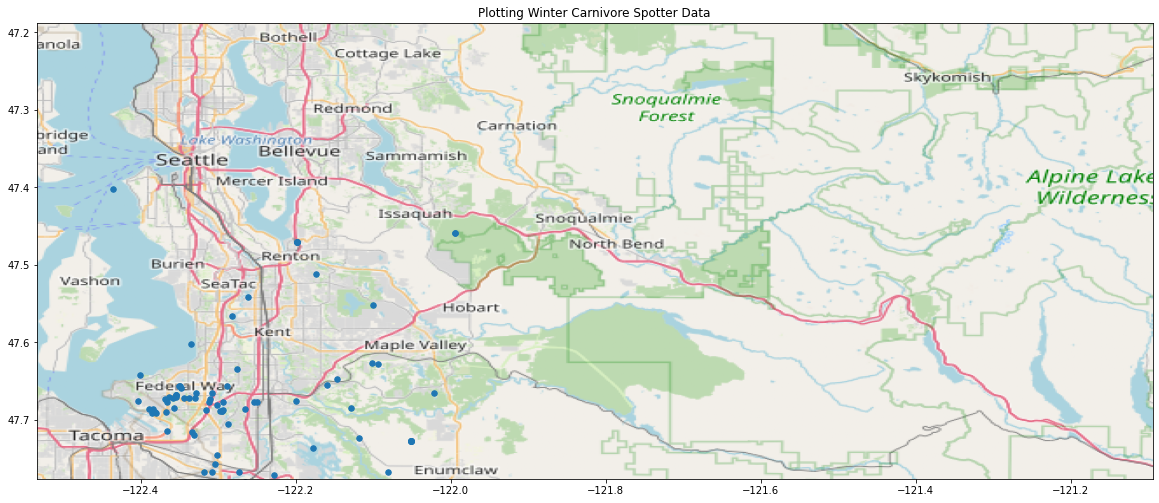

In [34]:
fig,ax=plt.subplots(figsize=(20,20))
ax.scatter(winter_df.Longitude,winter_df.Latitude,zorder=1,s=30)
ax.set_title("Plotting Winter Carnivore Spotter Data")
ax.set_xlim(BBox_kc[0],BBox_kc[1])
ax.set_ylim(BBox_kc[2],BBox_kc[3])
ax.imshow(kc_map,zorder=0,extent=BBox_kc, aspect = 'equal')

In [35]:
#combine all four seasons

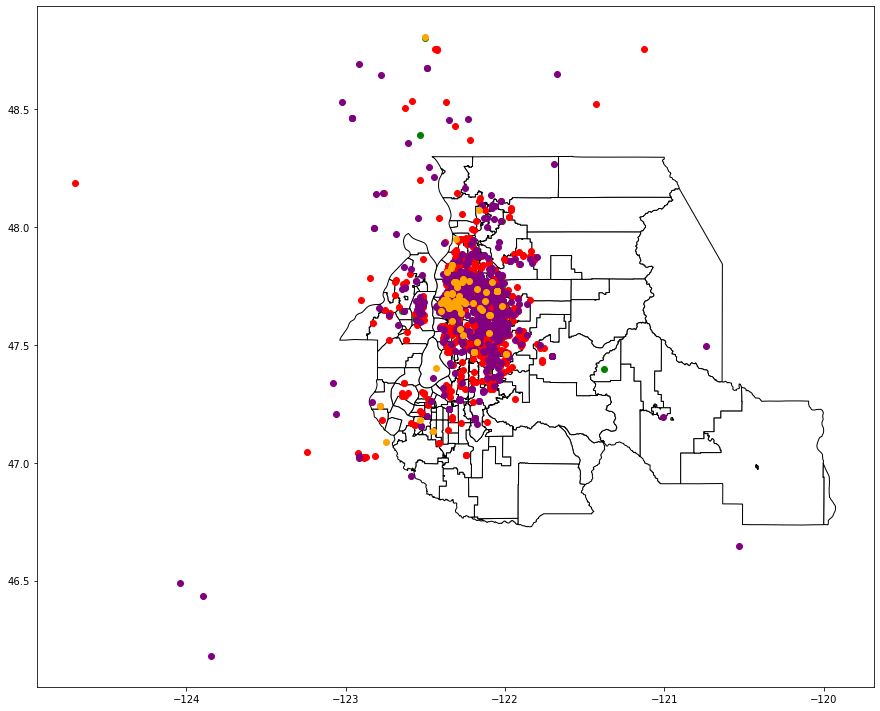

In [36]:
county_map.plot(color = 'white',edgecolor='black',figsize=(15,15))
plt.scatter(y=geo_spring_df['Latitude'],x=geo_spring_df['Longitude'],c='green')
plt.scatter(y=geo_summer_df['Latitude'],x=geo_summer_df['Longitude'],c='red')
plt.scatter(y=geo_fall_df['Latitude'],x=geo_fall_df['Longitude'],c='purple')
plt.scatter(y=geo_winter_df['Latitude'],x=geo_winter_df['Longitude'],c='orange')